## notes

Each estimation has a confidence, you can consider taking that into account during smoothing 

In [79]:
import matplotlib.pyplot as plt
import numpy as np


frames = np.load('frames.npy', allow_pickle=True)
labels = np.load('labels.npy', allow_pickle=True)


In [80]:
print(len(frames))

42


## Body part numbers

In [81]:
poses = frames[0]
person_at_frame = poses[0][0]
persons_pose = person_at_frame['pose']
for i in range(17):
    print(i,'\t' , persons_pose['keypoints'][i]['part'])


0 	 nose
1 	 leftEye
2 	 rightEye
3 	 leftEar
4 	 rightEar
5 	 leftShoulder
6 	 rightShoulder
7 	 leftElbow
8 	 rightElbow
9 	 leftWrist
10 	 rightWrist
11 	 leftHip
12 	 rightHip
13 	 leftKnee
14 	 rightKnee
15 	 leftAnkle
16 	 rightAnkle


In [87]:
raw_raw_frames = []
exclude = [9,10,8,7,4,3,1,2]
for i in range(1):
    poses = frames[i]
    raw_frames = []
    counter = 0
    for pose in poses:
        ## first grab person [0] then grab 'pose' 'then keypoints' then 'body part number'
        ## then grab 'position ' {'x', 'y'}
        body_positions = []
        for i in range(len(pose[0]['pose']['keypoints'])):
            if (i not in exclude):
                value = pose[0]['pose']['keypoints'][i]['position']
                body_positions.append(value)
        print(counter)
        counter+=1
        raw_frames.append(body_positions)
#         print(value)

print(np.asarray(raw_frames).shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
(39, 9)


In [95]:
#smoothing of length 3
def smoothing(x_arr, window_size = 3):
    smoothed = []
    for i in range(int(window_size/2),int(len(x_arr)-window_size/2)):
        smoothed.append(.333 * x_arr[i-1] + .333 * x_arr[i] + .333 * x_arr[i + 1])
    smoothed.append(np.mean(smoothed))
    smoothed.append(np.mean(smoothed))
    smoothed.append(np.mean(smoothed))
    return smoothed

def distance_matrix(pose):
    mat = np.zeros((9,9))
    for i, part1 in enumerate(pose):
        for j, part2 in enumerate(pose):
            mat[i][j] = np.sqrt((part1['x'] - part2['x'])**2 + (part1['y'] - part2['y'])**2)
    return mat
print(np.diag(distance_matrix(raw_frames[0])))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


 :) 

## 1D plotting of the y trajectory of the nose

In [96]:
x_arr = []
for i in range(1):
    poses = frames[5]
    for pose in poses:
        ## first grab person [0] then grab 'pose' 'then keypoints' then 'body part number'
        ## then grab 'position ' {'x', 'y'}
        value = pose[0]['pose']['keypoints'][0]['position']['y']
        print(value)
        x_arr.append(value)
print(len(x_arr))

4.047025862725391
4.047025862725391
3.5997223435786623
3.5997223435786623
3.320612321820164
3.320612321820164
4.132435224209601
4.132435224209601
3.202888533385874
3.202888533385874
1.7950680381373303
3.2211327506319947
3.2211327506319947
2.950039095813537
3.790398313288094
3.790398313288094
2.796452691448124
2.83003957648026
2.83003957648026
4.564705118101244
7.6871839973196785
7.6871839973196785
21.9861381188703
31.52682536759106
31.52682536759106
48.54789391828095
48.54789391828095
71.00479274697702
71.00479274697702
88.722450300964
88.722450300964
105.83438627901131
111.0369379292687
111.0369379292687
127.29945430049187
137.34776695801733
137.34776695801733
154.18688857764528
164.13474902772066
164.13474902772066
175.6142438922012
183.97299545317827
187.30946918212413
187.30946918212413
187.91706167001706
186.87361034965886
186.87361034965886
168.76435872871738
155.14380382515532
155.14380382515532
137.23807872155024
124.50503551936754
124.50503551936754
101.09473081592463
101.0947

Text(0.5, 1.0, 'Good Squat1')

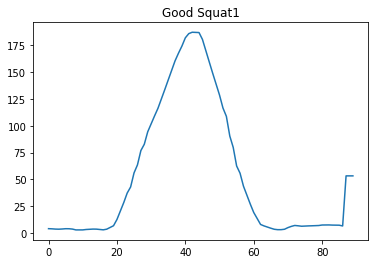

In [97]:
import scipy
plt.plot(smoothing(x_arr))
text = 'Good Squat' + str(labels[10])
plt.title(text)

## 2D trajectory of the shoulder

In [98]:
xy_arr = []
for i in range(1):
    poses = frames[0]
    for pose in poses:
        ## first grab person [0] then grab 'pose' 'then keypoints' then 'body part number'
        ## then grab 'position ' {'x', 'y'}
        xvalue = pose[0]['pose']['keypoints'][5]['position']['x']
        yvalue = pose[0]['pose']['keypoints'][5]['position']['y']
        xy_arr.append([xvalue, yvalue])

In [99]:
xy_arr2 = []
for i in range(1):
    poses = frames[10]
    for pose in poses:
        ## first grab person [0] then grab 'pose' 'then keypoints' then 'body part number'
        ## then grab 'position ' {'x', 'y'}
        xvalue = pose[0]['pose']['keypoints'][6]['position']['x']
        yvalue = pose[0]['pose']['keypoints'][6]['position']['y']
        xy_arr2.append([xvalue, yvalue])

Text(0.5, 1.0, 'Shoulder trajectory')

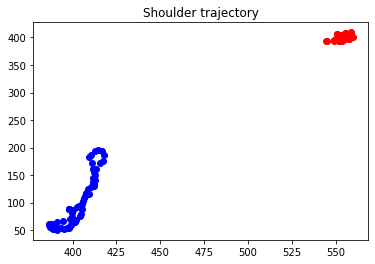

In [100]:
xy_arr = np.asarray(xy_arr)
xy_arr2 = np.asarray(xy_arr2)
## apply smoothing
xy_arr[:,0] = smoothing(xy_arr[:,0])
xy_arr[:,1] = smoothing(xy_arr[:,1])
xy_arr2[:,0] = smoothing(xy_arr2[:,0])
xy_arr2[:,1] = smoothing(xy_arr2[:,1])
plt.scatter(xy_arr[:,0], xy_arr[:,1], color='red')
plt.scatter(xy_arr2[:,0], xy_arr2[:,1], color='blue')
plt.title("Shoulder trajectory")

## We need to normalize signals to the same length so that classification is invariant to speed of squat

I think 10 is good density

In [101]:
import scipy.signal

distance_matrices = []
for frame in raw_frames:
    distance_matrices.append(distance_matrix(frame))

    
length = np.asarray(distance_matrices).shape[0]
desample_to = 10
# downsampled = scipy.signal.decimate()
#normalize samples
distance_matrices = np.asarray(distance_matrices).reshape(9,9,length)
#subtract mean and divide by max to get all signals in between -1 and 1
distance_matrices = (distance_matrices.reshape(length,9,9) - np.mean(distance_matrices, axis=2))/np.max(distance_matrices, axis=2)


distance_matrices = np.asarray(distance_matrices).reshape(9,9,length)
new_mat = np.zeros((9,9,desample_to))
for i in range(distance_matrices.shape[0]):
    for j in range(distance_matrices.shape[1]):
        signal = scipy.signal.resample(distance_matrices[i][j], desample_to)
        new_mat[i][j] = signal
print(new_mat.shape)

(9, 9, 10)


we now have a signal in a form that is ready to be classified.

## Final pipelines combining the parts
add smoothing strill

In [105]:
import scipy.signal
exclude = [9,10,8,7,4,3,1,2]
raw_raw_frames = []
for i in range(len(frames)):
    poses = frames[i]
    raw_frames = []
    for pose in poses:
        ## first grab person [0] then grab 'pose' 'then keypoints' then 'body part number'
        ## then grab 'position ' {'x', 'y'}
        body_positions = []
        for i in range(len(pose[0]['pose']['keypoints'])):
            if i not in exclude:
                value = pose[0]['pose']['keypoints'][i]['position']
                body_positions.append(value)
        raw_frames.append(body_positions)
    raw_raw_frames.append(raw_frames)

#smoothing of length 3
def smoothing(x_arr, window_size = 3):
    smoothed = []
    for i in range(int(window_size/2),int(len(x_arr)-window_size/2)):
        smoothed.append(.333 * x_arr[i-1] + .333 * x_arr[i] + .333 * x_arr[i + 1])
    smoothed.append(np.mean(smoothed))
    smoothed.append(np.mean(smoothed))
    smoothed.append(np.mean(smoothed))
    return smoothed

def distance_matrix(pose):
    mat = np.zeros((9,9))
    for i, part1 in enumerate(pose):
        for j, part2 in enumerate(pose):
            mat[i][j] = np.sqrt((part1['x'] - part2['x'])**2 + (part1['y'] - part2['y'])**2)
    return mat

data = []
for raw_frame in raw_raw_frames:
    distance_matrices = []
    for frame in raw_frames:
        distance_matrices.append(distance_matrix(frame))


    length = np.asarray(distance_matrices).shape[0]
    desample_to = 10
    # downsampled = scipy.signal.decimate()
    #normalize samples
    distance_matrices = np.asarray(distance_matrices).reshape(9,9,length)
    #subtract mean and divide by max to get all signals in between -1 and 1
    distance_matrices = (distance_matrices.reshape(length,9,9))/np.max(distance_matrices, axis=2)
    print(np.mean(distance_matrices.reshape(9,9,length)))
    distance_matrices = distance_matrices.reshape(length,9,9) - np.mean(distance_matrices.reshape(9,9,length), axis=2)
    
    distance_matrices = np.asarray(distance_matrices).reshape(9,9,length)
    new_mat = np.zeros((9,9,desample_to))
    for i in range(distance_matrices.shape[0]):
        for j in range(distance_matrices.shape[1]):
            signal = scipy.signal.resample(distance_matrices[i][j], desample_to)
            new_mat[i][j] = signal
    print(new_mat.shape)
    
    data.append(new_mat.reshape(10,9,9))
print('final shape' , np.asarray(data).shape)

0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.41341083011443397
(9, 9, 10)
0.413410

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.asarray(data).reshape(len(data),10, 9* 9), labels, train_size =.7, shuffle = True)

In [132]:
import tensorflow.keras as keras
from tensorflow.keras.optimizers import SGD
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(1, activation='relu'))
opt = SGD(lr=.05
         )
model.compile(loss='mse',
             optimizer = opt,
             metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100)               72800     
_________________________________________________________________
dropout_36 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 202       
_________________________________________________________________
dropout_37 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 3         
Total params: 73,005
Trainable params: 73,005
Non-trainable params: 0
_________________________________________________________________


In [133]:

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Train on 29 samples, validate on 13 samples
Epoch 1/10
29/29 [==============================] - 2s 85ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.1724 - accuracy: 0.8276 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.172

In [134]:
predictions = model.predict(x_test)
print(predictions)

[[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]
